## Bank Telemarketing Campaign Case Study.



Problem Statement:
The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. Objective : analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Target is to infer knowledge that where bank has to put more effort to improve it's positive response rate.

In [1]:
import pandas as pd
import numpy as np

attributes = pd.read_excel("Attribute_details_banking.xlsx")
attributes

,Attributes details,Unnamed: 1
0,Customer id,This column is about the id of the customer co...
1,age,This column consists of the age of each customer
2,salary,This column represents monthly salary of the c...
3,balance,This column represents the cash balance in the...
4,marital,This column consists of the information about...
5,jobedu,This column consists of the information about ...
6,targeted,NaN
7,default,This column consists of two categorical variab...
8,housing,This column consists of the two categorical v...
9,loan,This column consists of the two categorical va...


In [2]:
Marketing = pd.read_csv("bank_marketing.csv")
Marketing.head()

C:\Users\Sandy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
Marketing = pd.read_csv("bank_marketing.csv", skiprows=2)
Marketing.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
Marketing.shape

(45211, 19)

In [5]:
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [6]:
Marketing.describe()


,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [7]:
Marketing.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [8]:
Marketing = Marketing[~Marketing.age.isnull()]

In [9]:
Marketing= Marketing.astype({"age" : "int32"})

In [10]:
Marketing.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [11]:
Marketing = Marketing[~Marketing.response.isnull()]
Marketing = Marketing[~Marketing.month.isnull()]

In [12]:
Marketing.shape

(45111, 19)

In [13]:
##Marketing= Marketing.astype({"month" : "datetime64[ns, US/Eastern]"})

In [14]:
Marketing["job"] = Marketing.jobedu.apply(lambda x : x.split(",")[0])

In [15]:
Marketing["education"] = Marketing.jobedu.apply(lambda x : x.split(",")[1])

In [16]:
Marketing.drop("jobedu", axis = 1, inplace = True)

In [17]:
Marketing.drop("customerid" , axis = 1, inplace = True)

In [18]:
Marketing["Month_updated"] = pd.DatetimeIndex(Marketing["month"]).month

In [19]:
Marketing.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,Month_updated
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary,5
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary,5
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary,5
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown,5
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown,5


In [20]:
Marketing["pdays"].value_counts()

-1      36872
 182      167
 92       145
 91       126
 183      124
        ...  
 529        1
 18         1
 434        1
 466        1
 831        1
Name: pdays, Length: 558, dtype: int64

In [21]:
Marketing["pdays"].describe()

count    45111.000000
mean        40.193323
std        100.094574
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [22]:
## -1 in pdays represent customer has never been reached out , so its a null vale, replace -1 with Nan

In [23]:
Marketing.loc[Marketing.pdays<0, "pdays"] = np.NaN

In [24]:
Marketing["pdays"].describe()

count    8239.000000
mean      224.545819
std       115.226203
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [25]:
Marketing["pdays"].value_counts()

182.0    167
92.0     145
91.0     126
183.0    124
181.0    116
        ... 
536.0      1
838.0      1
424.0      1
805.0      1
484.0      1
Name: pdays, Length: 557, dtype: int64

In [26]:
Marketing.shape

(45111, 20)

In [27]:
Marketing.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,Month_updated
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,5
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,5
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,5
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,5
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,5


In [28]:
Marketing.age.describe()

count    45111.000000
mean        40.938352
std         10.619601
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [30]:

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [31]:
sns.set_style(style = "dark")

In [32]:
sns.color_palette("rocket", as_cmap=True)

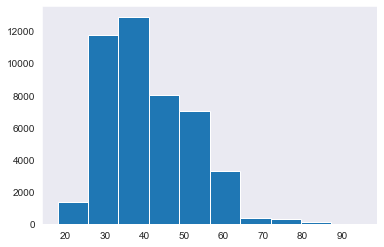

In [33]:
plt.hist(Marketing.age)
sns.color_palette("rocket", as_cmap=True)
plt.show()

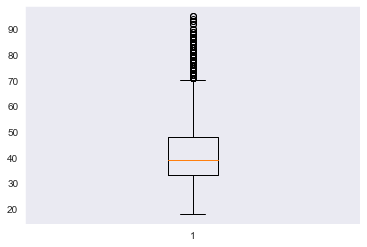

In [34]:
plt.boxplot(Marketing.age)
plt.show()

In [35]:
(Marketing["age"]>90).value_counts()

False    45104
True         7
Name: age, dtype: int64

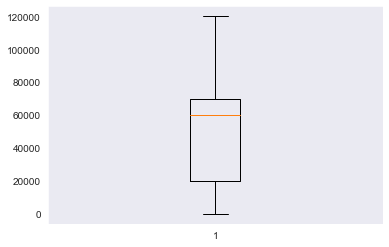

In [36]:
plt.boxplot(Marketing.salary)
plt.show()

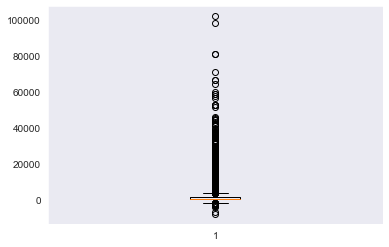

In [37]:
plt.boxplot(Marketing.balance)
plt.show()

In [38]:
Marketing.balance.quantile([0.5,0.7,0.95,0.99])

0.50      448.0
0.70     1126.0
0.95     5768.0
0.99    13164.9
Name: balance, dtype: float64

In [39]:
Marketing[Marketing["balance"]>15000].describe()

,age,salary,balance,day,campaign,pdays,previous,Month_updated
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556,7.088319
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590,2.877629
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000,1.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000,5.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000,7.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000,10.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000,12.000000


In [40]:
# noted that there are higher balance value, which skew our mean, but we cannot remove them as they can be more responsive cusrtomers. so we just take a note of that and at time of analysis, look at medians or quantiles instaed of mean.

In [41]:
Marketing.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [42]:
Marketing.duration.describe()

count       45111
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

In [43]:
Marketing.duration[0:5].apply(lambda x : float(x.split()[0])/60 if x.find("sec") >0 else float(x.split()[0]))

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [44]:
Marketing.duration.describe()

count       45111
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

In [45]:
Marketing.drop_duplicates()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,Month_updated
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,5
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,5
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,5
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,5
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary,11
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,retired,primary,11
45208,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184.0,3,success,yes,retired,secondary,11
45209,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,no,blue-collar,secondary,11


In [46]:
Marketing.reset_index(drop = True)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,Month_updated
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,5
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,5
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,5
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,5
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary,11
45107,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,retired,primary,11
45108,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184.0,3,success,yes,retired,secondary,11
45109,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,no,blue-collar,secondary,11


### Univariate analysis

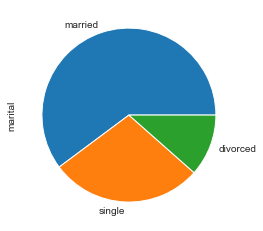

In [47]:
Marketing["marital"].value_counts().plot.pie()
plt.show()

In [48]:
Marketing["marital"].value_counts(normalize= True)

married     0.601937
single      0.282902
divorced    0.115160
Name: marital, dtype: float64

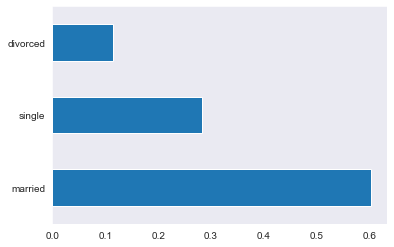

In [49]:
Marketing["marital"].value_counts(normalize= True).plot.barh()
plt.show()

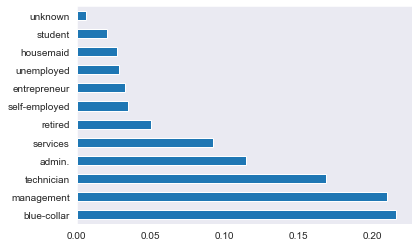

In [50]:
Marketing["job"].value_counts(normalize= True).plot.barh()
plt.show()

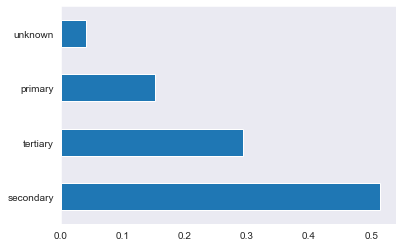

In [51]:
Marketing["education"].value_counts(normalize= True).plot.barh()
plt.show()

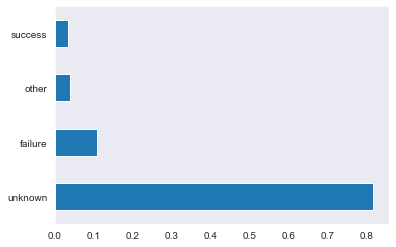

In [52]:
Marketing["poutcome"].value_counts(normalize= True).plot.barh()
plt.show()

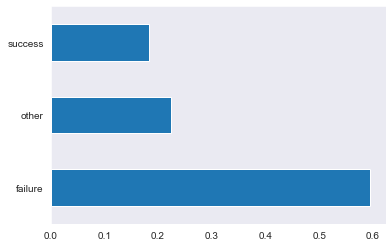

In [53]:
Marketing[~(Marketing["poutcome"]=="unknown")].poutcome.value_counts(normalize= True).plot.barh()
plt.show()

In [54]:
Marketing["response"].value_counts(normalize= True)

no     0.882978
yes    0.117022
Name: response, dtype: float64

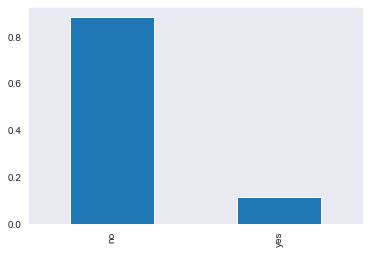

In [55]:
Marketing["response"].value_counts(normalize= True).plot.bar()
plt.show()

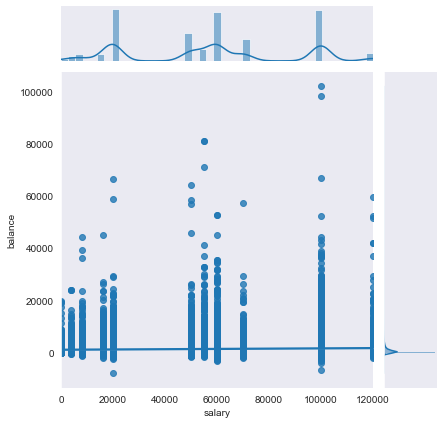

In [56]:
sns.jointplot(data = Marketing, x = "salary", y= "balance", kind = "reg")
plt.show()

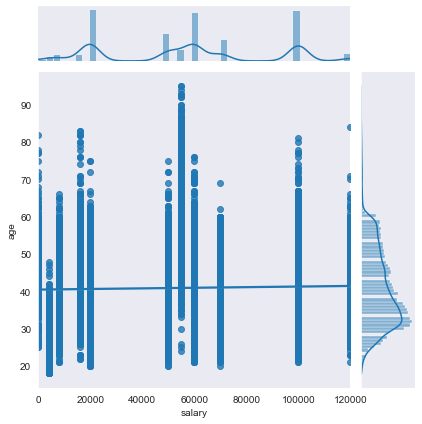

In [57]:
sns.jointplot(data = Marketing, x = "salary", y= "age", kind = "reg")
plt.show()

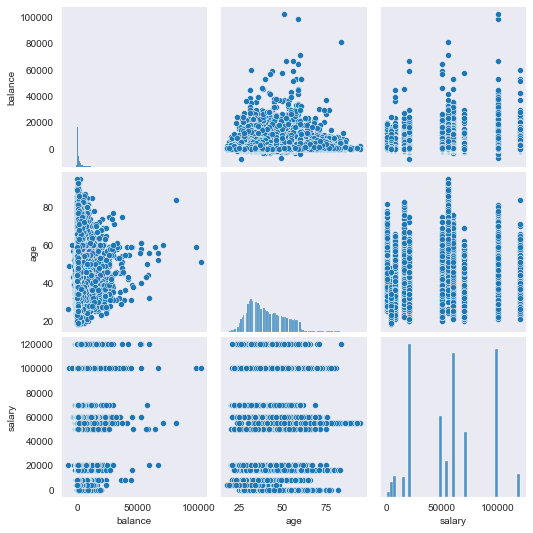

In [58]:
sns.pairplot(Marketing[["balance","age","salary"]])
plt.show()

In [59]:
Marketing[["balance","age","salary"]].corr()

,balance,age,salary
balance,1.000000,0.097802,0.055207
age,0.097802,1.000000,0.024558
salary,0.055207,0.024558,1.000000


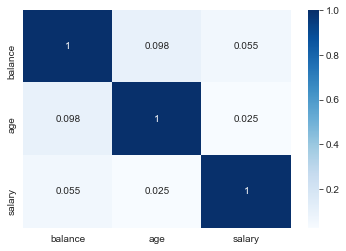

In [60]:
sns.heatmap(Marketing[["balance","age","salary"]].corr(),annot = True, cmap = "Blues")
plt.show()

In [61]:
Marketing.groupby(by=["response"])["salary"].mean()

response
no     56771.917052
yes    58770.411063
Name: salary, dtype: float64

In [62]:
Marketing.groupby(by=["response"])["salary"].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

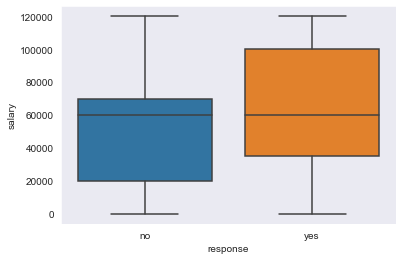

In [63]:
sns.boxplot(Marketing["response"],Marketing["salary"])
plt.show()

<AxesSubplot:xlabel='response', ylabel='balance'>

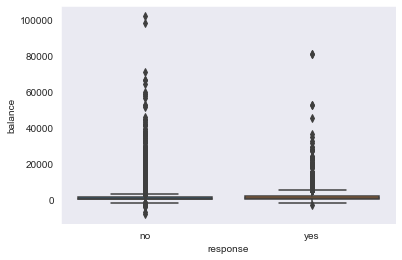

In [64]:
sns.boxplot(Marketing["response"],Marketing["balance"])

In [65]:
Marketing.groupby(by=["response"])["balance"].median()

response
no     417
yes    733
Name: balance, dtype: int64

In [66]:
def p75(x):
    return np.quantile(x, 0.75)

In [67]:
Marketing.groupby(by = ["response"])["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1303.851376,417,1345.0
yes,1805.364274,733,2159.5


<AxesSubplot:xlabel='response'>

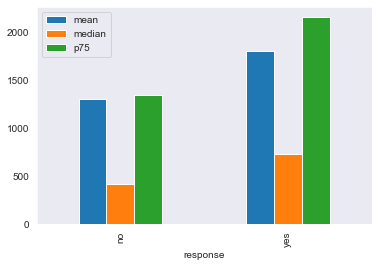

In [68]:
Marketing.groupby(by = ["response"])["balance"].aggregate(["mean","median",p75]).plot.bar()


In [69]:
Marketing.groupby(by=["education"])["salary"].mean()

education
primary      34235.285505
secondary    49731.024955
tertiary     82894.709074
unknown      46485.143166
Name: salary, dtype: float64

In [70]:
Marketing.groupby(by=["education"])["salary"].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

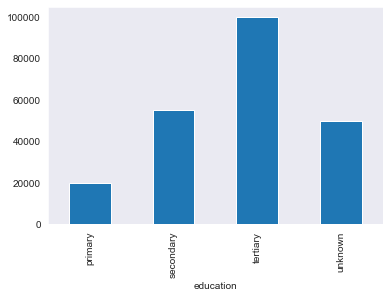

In [71]:
Marketing.groupby(by=["education"])["salary"].median().plot.bar()
plt.show()

In [72]:
Marketing.groupby(by=["job"])["salary"].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

In [73]:
Marketing.groupby(by=["job"])["salary"].median()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

<AxesSubplot:xlabel='job'>

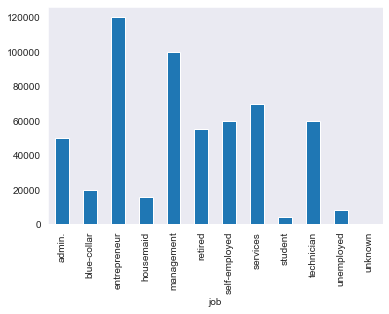

In [74]:
Marketing.groupby(by=["job"])["salary"].median().plot.bar()

In [75]:
Marketing["Age_bins"] = pd.cut(Marketing.age, bins = [0,30,40,50,60,9999], labels = ["0-30","30-40","40-50","50-60","60+"])

In [76]:
Marketing["response_flag"] = np.where(Marketing.response == "yes" , 1,0)

In [77]:
Marketing.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,education,Month_updated,Age_bins,response_flag
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,management,tertiary,5,50-60,0
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,technician,secondary,5,40-50,0
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,1,NaN,0,unknown,no,entrepreneur,secondary,5,30-40,0
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,blue-collar,unknown,5,40-50,0
4,33,0,1,single,no,no,no,no,unknown,5,...,1,NaN,0,unknown,no,unknown,unknown,5,30-40,0


In [78]:
Marketing.groupby(by=["education"])["response_flag"].mean()

education
primary      0.086384
secondary    0.105647
tertiary     0.149985
unknown      0.136143
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='education'>

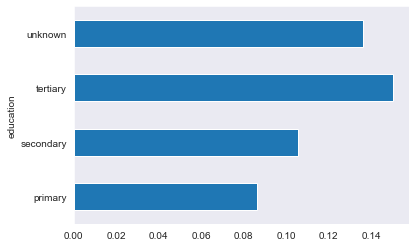

In [79]:
Marketing.groupby(by=["education"])["response_flag"].mean().plot.barh()

In [80]:
Marketing.groupby(by=["marital"])["response_flag"].mean()

marital
divorced    0.119346
married     0.101311
single      0.149506
Name: response_flag, dtype: float64

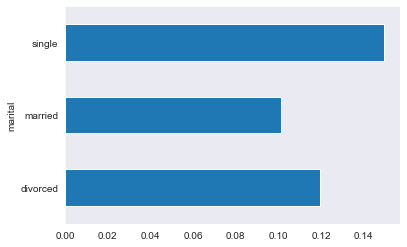

In [81]:
Marketing.groupby(by=["marital"])["response_flag"].mean().plot.barh()
plt.show()

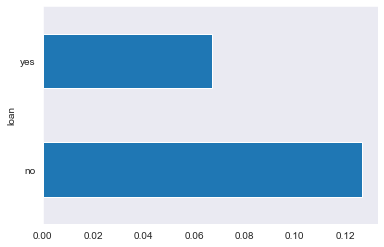

In [82]:
Marketing.groupby(by=["loan"])["response_flag"].mean().plot.barh()
plt.show()

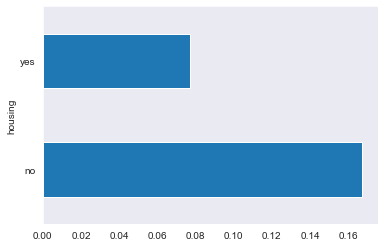

In [83]:
Marketing.groupby(by=["housing"])["response_flag"].mean().plot.barh()
plt.show()

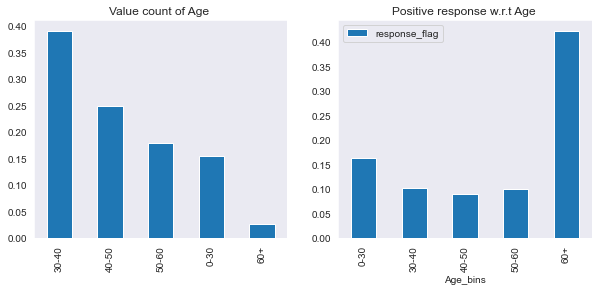

In [84]:
plt.figure(figsize = [10,4])

plt.subplot(1,2,1)
Marketing.Age_bins.value_counts(normalize = True).plot.bar()
plt.title("Value count of Age ")
plt.subplot(1,2,2)
Marketing.groupby(by = Marketing["Age_bins"])["response_flag"].mean().plot.bar()
plt.title("Positive response w.r.t Age ")
plt.legend()
plt.show()

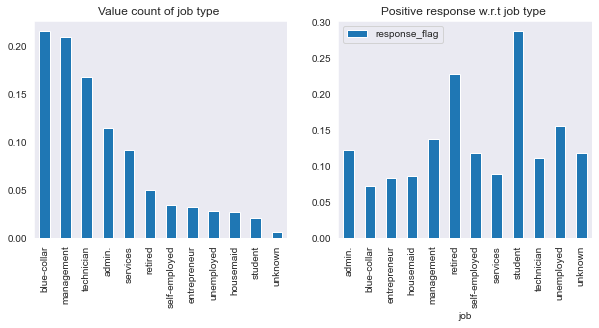

In [85]:
plt.figure(figsize = [10,4])

plt.subplot(1,2,1)
Marketing.job.value_counts(normalize = True).plot.bar()
plt.title("Value count of job type ")
plt.subplot(1,2,2)
Marketing.groupby(by = Marketing["job"])["response_flag"].mean().plot.bar()
plt.title("Positive response w.r.t job type ")
plt.legend()
plt.show()

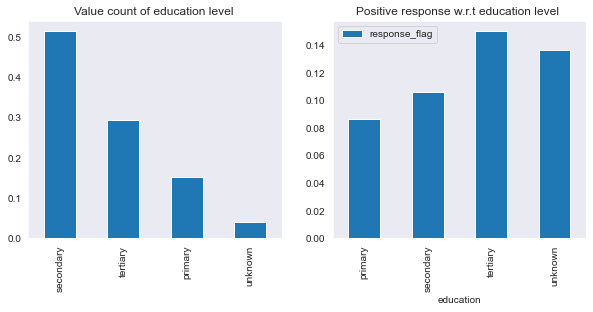

In [86]:
plt.figure(figsize = [10,4])

plt.subplot(1,2,1)
Marketing.education.value_counts(normalize = True).plot.bar()
plt.title("Value count of education level ")
plt.subplot(1,2,2)
Marketing.groupby(by = Marketing["education"])["response_flag"].mean().plot.bar()
plt.title("Positive response w.r.t education level ")
plt.legend()
plt.show()

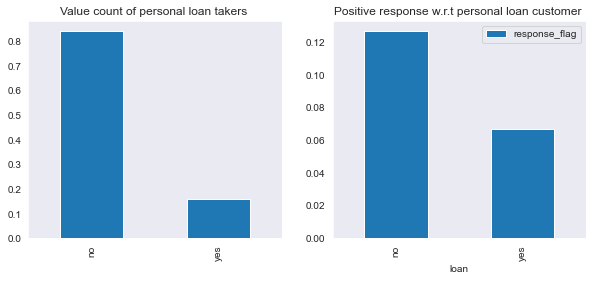

In [87]:
plt.figure(figsize = [10,4])

plt.subplot(1,2,1)
Marketing.loan.value_counts(normalize = True).plot.bar()
plt.title("Value count of personal loan takers ")
plt.subplot(1,2,2)
Marketing.groupby(by = Marketing["loan"])["response_flag"].mean().plot.bar()
plt.title("Positive response w.r.t personal loan customer ")
plt.legend()
plt.show()

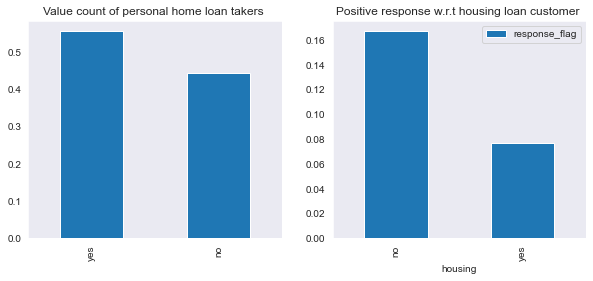

In [88]:
plt.figure(figsize = [10,4])

plt.subplot(1,2,1)
Marketing.housing.value_counts(normalize = True).plot.bar()
plt.title("Value count of personal home loan takers ")
plt.subplot(1,2,2)
Marketing.groupby(by = Marketing["housing"])["response_flag"].mean().plot.bar()
plt.title("Positive response w.r.t housing loan customer ")
plt.legend()
plt.show()

In [89]:
pivot4 = pd.pivot_table(data = Marketing, index = "education", columns = "marital" , values = "response_flag")
pivot4

marital,divorced,married,single
education,,,
primary,0.139037,0.075703,0.105758
secondary,0.103240,0.094718,0.129408
tertiary,0.137509,0.129735,0.183588
unknown,0.142012,0.122944,0.163188


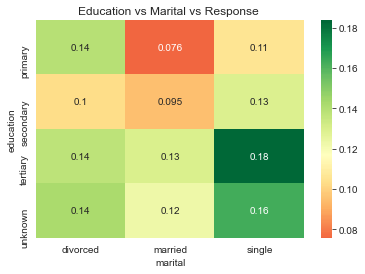

In [90]:
sns.heatmap(pivot4, annot = True, cmap = "RdYlGn",center = 0.117)
plt.title("Education vs Marital vs Response ")
plt.show()

In [91]:
pivot5 = pd.pivot_table(data = Marketing, index = "job", columns = "marital" , values = "response_flag")

pivot5

marital,divorced,married,single
job,,,
admin.,0.120160,0.113552,0.136311
blue-collar,0.077644,0.062851,0.105812
entrepreneur,0.083799,0.075914,0.113924
housemaid,0.098361,0.072687,0.160839
management,0.127928,0.126113,0.162245
retired,0.283688,0.221193,0.120370
self-employed,0.158273,0.079717,0.190045
services,0.089580,0.074229,0.117794
student,0.166667,0.185185,0.294185


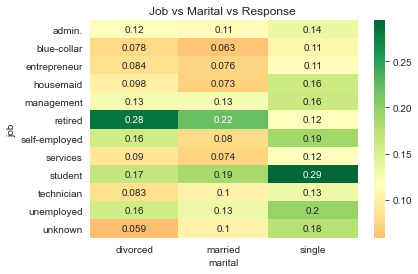

In [92]:
sns.heatmap(pivot5, annot = True, cmap = "RdYlGn",center = 0.117)
plt.title("Job vs Marital vs Response ")
plt.show()

In [93]:
pivot6 = pd.pivot_table(data = Marketing, index = "education", columns = "job" , values = "response_flag")

pivot6

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,0.057416,0.058195,0.065574,0.077047,0.074830,0.224464,0.038462,0.084548,0.363636,0.082278,0.132812,0.058824
secondary,0.119002,0.080708,0.096296,0.083756,0.086685,0.210794,0.074653,0.085507,0.297244,0.099253,0.148352,0.126761
tertiary,0.173684,0.161074,0.075912,0.127907,0.145352,0.273973,0.159613,0.125000,0.265766,0.145260,0.193772,0.102564
unknown,0.105882,0.072848,0.093333,0.088889,0.199170,0.254237,0.128205,0.127517,0.263804,0.095041,0.137931,0.141732


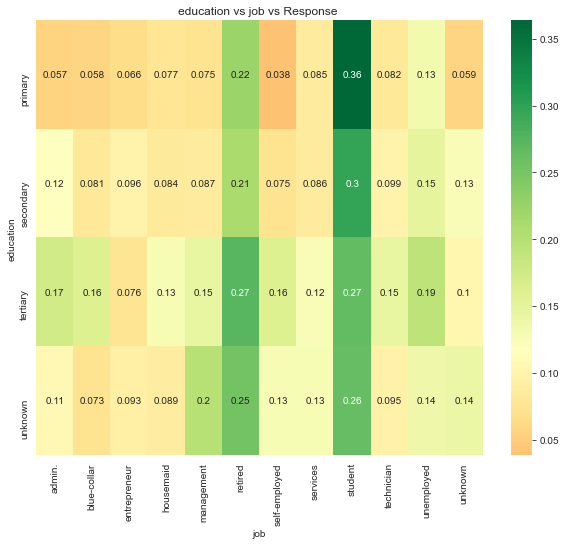

In [94]:
plt.figure(figsize = [10,8])
sns.heatmap(pivot6, annot = True, cmap = "RdYlGn",center = 0.117)
plt.title("education vs job vs Response ")
plt.show()

In [95]:
pivot7 = pd.pivot_table(data = Marketing, index = "education", columns = "poutcome" , values = "response_flag")

pivot7

poutcome,failure,other,success,unknown
education,,,,
primary,0.088924,0.143443,0.609023,0.071748
secondary,0.109049,0.140831,0.642325,0.084311
tertiary,0.168237,0.220994,0.656452,0.114229
unknown,0.158192,0.200000,0.679012,0.102094


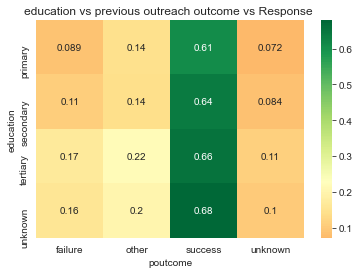

In [96]:

sns.heatmap(pivot7, annot = True, cmap = "RdYlGn",center = 0.23)
plt.title("education vs previous outreach outcome vs Response ")
plt.show()